<a href="https://colab.research.google.com/github/hurutta/XFedAi/blob/main/XFedAi_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [553]:
import random
import numpy as np
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
import time
import timeit

import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset  
from torch.utils.data import TensorDataset

In [554]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/ML/ct_data_clean/COVID')

for file in myFileList:
    #print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/ML/ct_data_clean/COVID


In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
img = pd.read_csv('/content/img_pixels.csv')
img.shape

(1001, 10000)

In [569]:
x = np.array(img.iloc[0])
df = pd.DataFrame({"pixels": [x],"cvd": 1})

In [570]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1


In [571]:
for i in range(1,len(img),1):
    x = np.array(img.iloc[i])
    dict = {'pixels': x,"cvd": 1}
    df = df.append(dict, ignore_index = True)
    #print(i,x)

In [572]:
args = {
    "batch_size" : 64,
    "num_clients": 2,
    "frac": 1,
    "ep_local": 2,
    "bs_local": 10,
    "epochs": 2,
    "dataset": "CIFAR10",
    "model": "CNN",
    "iid": "iid",
    
    # Unlearning params
    "unlearned_clients": [0], 
    "t": 2, # calibration_interval,
    "r": 0.5 # local_calibration_epoch_ratio r = Ecali/Eloc
    
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [573]:
print(device)

cpu


In [574]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1
...,...,...
996,"[66, 70, 72, 70, 63, 80, 165, 216, 209, 206, 2...",1
997,"[206, 207, 208, 208, 206, 209, 204, 205, 205, ...",1
998,"[196, 194, 194, 195, 193, 193, 195, 199, 195, ...",1
999,"[73, 66, 117, 209, 212, 204, 206, 205, 208, 21...",1


In [562]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/ML/ct_data_clean/non-COVID')

for file in myFileList:
    #print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    with open("img_pixels2.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/ML/ct_data_clean/non-COVID


In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files
img2 = pd.read_csv('/content/img_pixels2.csv')
img2.shape

(983, 10000)

In [576]:
df

,pixels,cvd
0,"[68, 68, 68, 68, 68, 69, 69, 68, 182, 200, 188...",1
1,"[205, 205, 206, 204, 207, 207, 205, 204, 206, ...",1
2,"[68, 70, 64, 86, 191, 212, 194, 195, 195, 194,...",1
3,"[136, 202, 198, 190, 193, 194, 192, 192, 196, ...",1
4,"[209, 211, 200, 199, 200, 206, 205, 200, 197, ...",1
...,...,...
996,"[66, 70, 72, 70, 63, 80, 165, 216, 209, 206, 2...",1
997,"[206, 207, 208, 208, 206, 209, 204, 205, 205, ...",1
998,"[196, 194, 194, 195, 193, 193, 195, 199, 195, ...",1
999,"[73, 66, 117, 209, 212, 204, 206, 205, 208, 21...",1


In [577]:
for i in range(0,len(img2),1):
    x = np.array(img2.iloc[i])
    dict = {'pixels': x,"cvd": 0}
    df = df.append(dict, ignore_index = True)
    #print(i,x)

In [578]:
df.shape

(1984, 2)

In [579]:
df = df.sample(frac=1).reset_index(drop=True)
df1=df.iloc[0:1544]
df2=df.iloc[1544:1764]
df3=df.iloc[1764:1984]

In [586]:
df1.shape

(1544, 2)

In [587]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 100, 100))
    image_label = np.array(list(map(int, data['cvd'])))

    for i, row in enumerate(data.index):
        image = data.loc[row, 'pixels']
        image = np.reshape(image, (100, 100))
        image_array[i] = image
        
    return image_array, image_label

In [593]:
df3['cvd'].value_counts()

1    115
0    105
Name: cvd, dtype: int64

In [594]:
status = {0: 'no_covid', 1: 'covid'}
print(df.shape)
train_image_array, train_image_label = prepare_data(df1)
val_image_array, val_image_label = prepare_data(df2)
test_image_array, test_image_label = prepare_data(df3)

(1984, 2)


In [595]:
train_image_array[0]

array([[202., 203., 206., ..., 204., 204., 204.],
       [202., 203., 206., ..., 204., 204., 205.],
       [205., 205., 207., ..., 204., 204., 205.],
       ...,
       [210., 206., 206., ..., 208., 208., 208.],
       [217., 210., 207., ..., 207., 207., 206.],
       [227., 223., 217., ..., 208., 208., 209.]])

In [596]:
#reshape and scale
train_images = train_image_array.reshape((train_image_array.shape[0], 1, 100, 100))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 1, 100, 100))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 1, 100, 100))
test_images = test_images.astype('float32')/255

In [597]:
train_images[0]

array([[[0.7921569 , 0.79607844, 0.80784315, ..., 0.8       ,
         0.8       , 0.8       ],
        [0.7921569 , 0.79607844, 0.80784315, ..., 0.8       ,
         0.8       , 0.8039216 ],
        [0.8039216 , 0.8039216 , 0.8117647 , ..., 0.8       ,
         0.8       , 0.8039216 ],
        ...,
        [0.8235294 , 0.80784315, 0.80784315, ..., 0.8156863 ,
         0.8156863 , 0.8156863 ],
        [0.8509804 , 0.8235294 , 0.8117647 , ..., 0.8117647 ,
         0.8117647 , 0.80784315],
        [0.8901961 , 0.8745098 , 0.8509804 , ..., 0.8156863 ,
         0.8156863 , 0.81960785]]], dtype=float32)

In [598]:
print(type(train_images))
train_image_label.shape

<class 'numpy.ndarray'>


(1544,)

In [599]:
train_labels = train_image_label
val_labels = val_image_label
test_labels = test_image_label

In [600]:
test_labels

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [601]:
#Convert to tensor
train_images = torch.from_numpy(train_images)
train_labels = torch.from_numpy(train_labels)
val_images = torch.from_numpy(val_images)
val_labels = torch.from_numpy(val_labels)
test_images = torch.from_numpy(test_images)
test_labels = torch.from_numpy(test_labels)

In [602]:
#type(train_images)
#train_labels[1]
train_labels

tensor([1, 0, 1,  ..., 0, 1, 1])

In [603]:
# to dataset
dataset_train = TensorDataset(train_images, train_labels)
dataset_val = TensorDataset(val_images, val_labels)
dataset_test = TensorDataset(test_images, test_labels)

In [604]:
type(dataset_train)

torch.utils.data.dataset.TensorDataset

In [605]:
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=args["batch_size"], shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=args["batch_size"], shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset_val, batch_size=args["batch_size"], shuffle=True)

In [606]:
print(train_loader)

In [608]:
c=0
i=1
for x, y in train_loader:
    print(i,x.shape, y.shape)
    c+=64
    i+=1
print(c)

1 torch.Size([64, 1, 100, 100]) torch.Size([64])
2 torch.Size([64, 1, 100, 100]) torch.Size([64])
3 torch.Size([64, 1, 100, 100]) torch.Size([64])
4 torch.Size([64, 1, 100, 100]) torch.Size([64])
5 torch.Size([64, 1, 100, 100]) torch.Size([64])
6 torch.Size([64, 1, 100, 100]) torch.Size([64])
7 torch.Size([64, 1, 100, 100]) torch.Size([64])
8 torch.Size([64, 1, 100, 100]) torch.Size([64])
9 torch.Size([64, 1, 100, 100]) torch.Size([64])
10 torch.Size([64, 1, 100, 100]) torch.Size([64])
11 torch.Size([64, 1, 100, 100]) torch.Size([64])
12 torch.Size([64, 1, 100, 100]) torch.Size([64])
13 torch.Size([64, 1, 100, 100]) torch.Size([64])
14 torch.Size([64, 1, 100, 100]) torch.Size([64])
15 torch.Size([64, 1, 100, 100]) torch.Size([64])
16 torch.Size([64, 1, 100, 100]) torch.Size([64])
17 torch.Size([64, 1, 100, 100]) torch.Size([64])
18 torch.Size([64, 1, 100, 100]) torch.Size([64])
19 torch.Size([64, 1, 100, 100]) torch.Size([64])
20 torch.Size([64, 1, 100, 100]) torch.Size([64])
21 torch.

In [611]:
# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*23*23, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [612]:
for images, y in val_loader:
    #print(x.shape, y.shape)
    break
conv1 = nn.Conv2d(1, 32, 3)             
conv2 = nn.Conv2d(32, 64, 3)
pool = nn.MaxPool2d(2, 2)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([64, 1, 100, 100])
torch.Size([64, 32, 98, 98])
torch.Size([64, 32, 49, 49])
torch.Size([64, 64, 47, 47])
torch.Size([64, 64, 23, 23])


In [613]:
print(images.shape)                 #10x33856 and 6400x64)
#torch.Size([64, 1, 100, 100]) batch size, color channel, size

torch.Size([64, 1, 100, 100])


In [614]:
class DatasetSplit(Dataset):
    def __init__(self, dataset_train, idxs):
        self.dataset_train = dataset_train
        self.idxs = list(idxs)

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset_train[self.idxs[item]]
        return image, label

In [615]:
# Distribute data - IID
num_items = int(len(dataset_train)/args["num_clients"])
dict_users, all_idxs = {}, [i for i in range(len(dataset_train))]
for i in range(args["num_clients"]):
    dict_users[i] = set(np.random.choice(all_idxs, num_items, replace=False))
    all_idxs = list(set(all_idxs) - dict_users[i])

local_datasets = []
for i in range(args["num_clients"]):
    local_datasets.append(DataLoader(DatasetSplit(dataset_train, dict_users[i]),
                                 batch_size=args["bs_local"], shuffle=True))

In [618]:
len(local_datasets[0])

78

In [619]:
class Client:
    num_clients = 0
    def __init__(self, data):
        self.id = Client.num_clients
        self.dataloader = data
        self.__model = None
        self.model_record = []
        self.device = device
        self.unlearned = False
        Client.num_clients += 1
        
        
    def setup(self, args):
        self.local_epoch = args["ep_local"]
        
        
    @property
    def unlearned(self):
        return self.__unlearned
    
    
    @unlearned.setter
    def unlearned(self, unlearned):
        self.__unlearned = unlearned
        
        
    @property
    def model(self):
        return self.__model
    
    
    @model.setter
    def model(self, model):
        self.__model = model
        
        
    def client_update(self):
        self.model.train()
        self.model.to(self.device)

        optimizer = optim.SGD(self.model.parameters(), lr=0.01)
        epoch_loss = []
        
        for epoch in range(self.local_epoch):
            batch_loss = []
            
            for batch_idx, (data, labels) in enumerate(self.dataloader):
                data, labels = data.to(self.device), labels.long().to(self.device)
                 
                self.model.zero_grad()
                outputs = self.model(data)
                loss = F.nll_loss(outputs, labels)

                loss.backward()
                optimizer.step() 

                batch_loss.append(loss.item())
            
            #print(f"Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        #return self.model.state_dict(), sum(epoch_loss) / len(epoch_loss)
        return self.model, sum(epoch_loss) / len(epoch_loss)
    
    
    def client_test(self):
        self.model.eval()
        self.model.to(self.device)
        test_loss, correct = 0, 0
        with torch.no_grad():
            for data, labels in self.dataloader:
                data, labels = data.to(self.device), labels.to(self.device)
                outputs = self.model(data)
                test_loss += F.nll_loss(outputs, labels, reduction='sum').item()
                predicted = outputs.argmax(dim=1, keepdim=True)
                correct += predicted.eq(labels.data.view_as(predicted)).long().cpu().sum()


        test_loss /= len(self.dataloader.dataset)
        test_accuracy = correct / len(self.dataloader.dataset)

        print(f"Average loss: {test_loss:.4f}, Accuracy: {100. * test_accuracy:.2f}%")

        return test_accuracy, test_loss

In [620]:
class Server:
    def __init__(self):
        self.round = 0
        self.model = Net().to(device)
        self.w_glob = None
        self.device = device
        
        self.history = {
            "train_loss": [], 
            "test_loss": [], 
            "train_acc": [],
            "test_acc": []
        }
        
        
    def setup(self, args):
        self.train_loader = train_loader
        self.test_loader = test_loader
        
        self.num_clients = args["num_clients"]
        self.num_rounds = args["epochs"]
        self.local_epochs = args["ep_local"]
        self.batch_size = args["batch_size"]
        self.clients = args["clients"]
        self.unlearned_clients = args["unlearned_clients"]
        
        self.local_model_record = [[] for i in range(self.num_clients)]
        self.global_model_record = []
        
        
    def fedAvg(self, w):
        w_avg = copy.deepcopy(w[0])
        for k in w_avg.keys():
            for i in range(1, len(w)):
                w_avg[k] += w[i][k]
            w_avg[k] = torch.div(w_avg[k], len(w))
        self.model
        return w_avg
    
    
    def send_global_model(self):
        for client in self.clients:
            #client.w_local = copy.deepcopy(self.w_glob)
            client.model = copy.deepcopy(self.model)
            client.model_record.append(client.model)
        
        
    def train_global_model(self):
        w_locals = [self.w_glob for i in range(self.num_clients)]
        loss_locals = [0 for i in range(self.num_clients)]
        
        # Send global model to clients
        self.send_global_model()
        print("Send global model to all clients...")
        
        # Train local model
        acc_test_clients, loss_test_clients = [], []
        for id, client in enumerate(self.clients):
            print(f"\nUpdating client {id}...")
            local_model, loss_train_client = client.client_update()
            
            # Save local models
            self.local_model_record[id].append(local_model)
            w_locals.append(local_model.state_dict())
            #print(w_locals)
            loss_locals.append(loss_train_client)
            
            print(f"Evaluating client {id}...")
            acc_test_client, loss_test_client = client.client_test()
            acc_test_clients.append(acc_test_client)
            loss_test_clients.append(loss_test_client)
            
            
        # Fed Aggregation
        w_glob = self.fedAvg(w_locals)
            
        # Update global model
        self.model.load_state_dict(w_glob)
            
        return acc_test_clients, loss_locals
    
    
    def federated_learning(self):
        self.model.train()
        self.w_glob = self.model.state_dict()
        
        print("\tFederated Learning:")
        for round in tqdm(range(self.num_rounds)):
            self.round = round + 1
            print(f"\nRound {self.round}/{self.num_rounds}: Starting...")
            acc_train_clients, loss_train_clients = self.train_global_model()
            self.history["train_acc"].append(100*sum(acc_train_clients)/len(acc_train_clients))
            self.history["train_loss"].append(sum(loss_train_clients)/len(loss_train_clients))
            
            print(f"\nRound {self.round}: Evaluating...")
            # Save test accuracy and loss
            acc_test_server, loss_test_server = self.test_global_model()
            self.history["test_acc"].append(acc_test_server)
            self.history["test_loss"].append(loss_test_server)
            
            print(f"|---- Average Clients Loss: {sum(loss_train_clients) / len(loss_train_clients)}")
            print(f"|---- Average Clients Accuracy: {100*sum(acc_train_clients)/len(acc_train_clients):.2f}%")
            print(f"|---- Server Testing Accuracy: {acc_test_server:.2f}%")
            
            print(f"\nRound {self.round}: Finished!\n")
            print(f"---------------------------------")
            
        self.show_result()
        self.plot(self.history)
        
        
    def show_result(self):
        # Testing data
        acc_test_server, loss_test_server = self.test_global_model()
        print(f' \n Results after {self.num_rounds} global rounds of training:')
        print(f"|---- Testing Accuracy: {acc_test_server:.2f}%")

        # Unlearned client
        print(f"\nUnlearned Clients:")
        for i in self.unlearned_clients:
            acc_test, loss_test = self.clients[i].client_test()
            print(f"|---- Unlearned Client - {i} Accuracy: {100*acc_test:.2f}%")
            
            
    def plot(self, history):
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(history["train_loss"], color="b", label="Training Loss")
        axs[0].plot(history["test_loss"], color='r', label="Testing Loss")
        legend = axs[0].legend(loc="best", shadow=True)
        axs[0].set_xlabel("Communication Rounds")
        axs[0].set_ylabel("Loss")
        
        axs[1].plot(history["train_acc"], color="b", label="Training Accuracy")
        axs[1].plot(history["test_acc"], color='r', label="Testing Accuracy")
        legend = axs[1].legend(loc="best", shadow=True)
        axs[1].set_xlabel("Communication Rounds")
        axs[1].set_ylabel("Accuracy")
        
        
    def test_global_model(self):
        self.model.eval()
        
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, labels in self.test_loader:
                data, labels = data.to(self.device), labels.to(self.device)
                output = self.model(data)
                test_loss += F.nll_loss(output, labels, reduction='sum').item()  
                pred = output.argmax(dim=1, keepdim=True)  
                #correct += pred.eq(target.view_as(pred)).sum().item()
                correct += pred.eq(labels.data.view_as(pred)).long().cpu().sum()


        test_loss /= len(self.test_loader.dataset)
        accuracy = 100. * correct / len(self.test_loader.dataset)

        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({ 100. * correct / len(test_loader.dataset):.2f}%)\n')

        return accuracy, test_loss
    

In [621]:
# Create clients and distribute the dataset 
# All clients are stored in list clients
args["clients"] = []
for i in range(args["num_clients"]):
    client = Client(local_datasets[i])
    client.setup(args)
    args["clients"].append(client)
    
for unlearned in args["unlearned_clients"]:
    args["clients"][unlearned].unlearned = True

In [622]:
# Create a server
server = Server()
server.setup(args)

	Federated Learning:


  0%|          | 0/2 [00:00<?, ?it/s]


Round 1/2: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.6843, Accuracy: 64.51%

Updating client 1...
Evaluating client 1...
Average loss: 0.6996, Accuracy: 50.13%

Round 1: Evaluating...


 50%|█████     | 1/2 [00:44<00:44, 44.44s/it]


Test set: Average loss: 0.6860, Accuracy: 115/220 (52.27%)

|---- Average Clients Loss: 0.3443135638267566
|---- Average Clients Accuracy: 57.32%
|---- Server Testing Accuracy: 52.27%

Round 1: Finished!

---------------------------------

Round 2/2: Starting...
Send global model to all clients...

Updating client 0...
Evaluating client 0...
Average loss: 0.7621, Accuracy: 50.13%

Updating client 1...
Evaluating client 1...
Average loss: 0.6248, Accuracy: 67.75%

Round 2: Evaluating...


100%|██████████| 2/2 [01:29<00:00, 44.52s/it]


Test set: Average loss: 0.6651, Accuracy: 134/220 (60.91%)

|---- Average Clients Loss: 0.33375032093280405
|---- Average Clients Accuracy: 58.94%
|---- Server Testing Accuracy: 60.91%

Round 2: Finished!

---------------------------------



Test set: Average loss: 0.6651, Accuracy: 134/220 (60.91%)

 
 Results after 2 global rounds of training:
|---- Testing Accuracy: 60.91%

Unlearned Clients:
Average loss: 0.7621, Accuracy: 50.13%
|---- Unlearned Client - 0 Accuracy: 50.13%


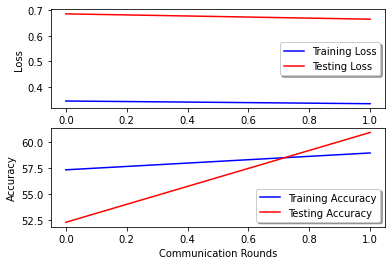

In [623]:
server.federated_learning()